In [1]:
from auto_control_tools import Model, Controller

In [2]:
tf = [[1], [1, 2]]
pid = (1, 1, 0)

In [3]:
model = Model(tf)
ki, kp, kd = pid
ctrl = Controller(model, ki=ki, kp=kp, kd=kd)

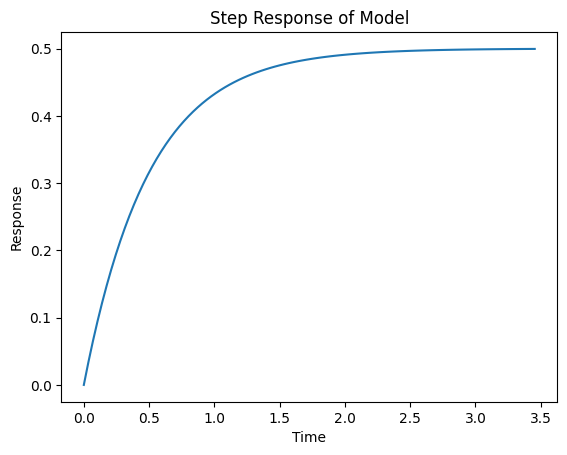

In [4]:
model.view.plot_model_graph()

In [5]:
model.view.print_model_data()

,RiseTime,SettlingTime,SettlingMin,SettlingMax,Overshoot,Undershoot,Peak,PeakTime,SteadyStateValue
0,1.081517,1.988596,0.45,0.5,0,0,0.4995,3.453878,0.5


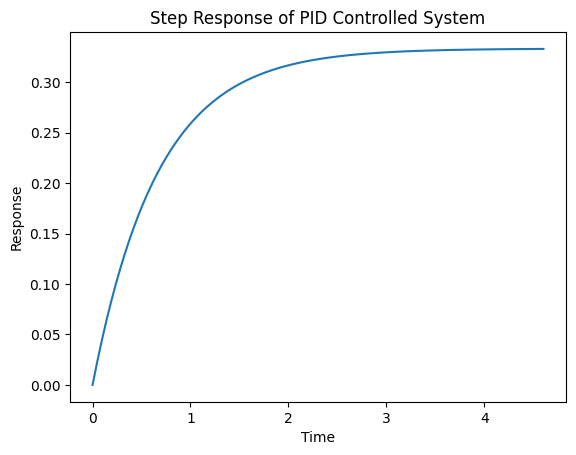

In [6]:
ctrl.view.plot_controller_graph()

In [7]:
ctrl.view.print_controller_data()

,RiseTime,SettlingTime,SettlingMin,SettlingMax,Overshoot,Undershoot,Peak,PeakTime,SteadyStateValue
0,1.48854,2.651462,0.302247,0.333333,0,0,0.333,4.60517,0.333333


In [8]:
import control

In [9]:
time, response = control.step_response(model.tf)

In [10]:

import matplotlib.pyplot as plt

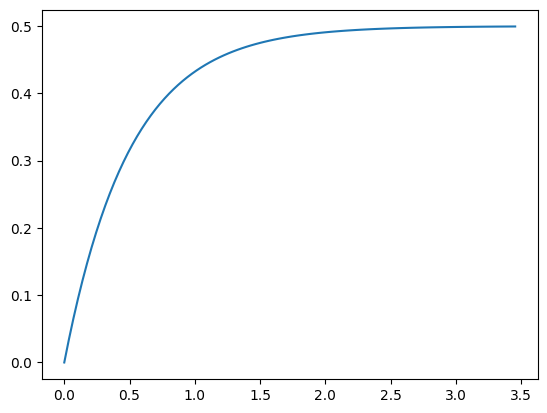

In [11]:
plt.plot(time, response)

In [12]:
control.step_info(model.tf)

{'RiseTime': 1.0815172406487183,
 'SettlingTime': 1.9885962166766757,
 'SettlingMin': 0.45,
 'SettlingMax': 0.5,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 0.49949999999999994,
 'PeakTime': 3.4538776394910684,
 'SteadyStateValue': 0.5}